<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
    6.1 [**Fixing engV missing / erroneous values**](#Section6_1)<br>
    6.2 [**Fixing price missing / erroneous values**](#Section6_2)<br>
    6.3 [**Fixing mileage missing / erroneous values**](#Section6_3)<br>
    6.4 [**Fixing drive missing / erroneous values**](#Section6_4)<br>
    6.5 [**Fixing engType missing / erroneous values**](#Section6_5)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
    8.1 [**Q - Which car manufacturer had highest sales?**](#Section8_1)<br>
    8.2 [**Q - What is the sales trend for top selling car manufacturers?**](#Section8_2)<br>
    8.3 [**Q - Which cars gain or loose the market?**](#Section8_3)<br>
    8.4 [**Q - What are the top 10 Pemium cars & models and their sales?**](#Section8_4)<br>
    8.5 [**Q - What are the sales & revenue in each segment of class ?**](#Section8_5)<br>
    8.6 [**Q - What is the revenue generated in each segment of class ?**](#Section8_6)<br>
    8.7 [**Q - What is the sales trend based on body ?**](#Section8_7)<br>
    8.8 [**Q - What are the best mileage cars in each segment of 'class' ?**](#Section8_8)<br>
    8.9 [**Q - Used car registrations by class ?**](#Section8_9)<br>
    8.10 [**Q - Derive the correlation between sales and other values ?**](#Section8_10)<br>
9. [**Summarization**](#Section9)<br>
  9.1 [**Conclusion**](#Section91)<br>
  9.2 [**Actionable Insights**](#Section92)<br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

- Write down some interesting introduction related to the topic.

- Surf out over the internet and do some research about what is happening in real life.

- Try out and make some concrete points about your point of view.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- This section is emphasised on providing some generic introduction to the problem that most companies confronts.

- **Example Problem Statement:**

  - In the past few years, prices of new cars have skyrocketed, due to which most people are incapable of buying a new one.

  - Customers buying a new car always looks for assurity of their money to be worthy.

  - But due to the increased price of new cars, used car sales are on a global increase (Pal, Arora and Palakurthy, 2018).

  - There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features.

  - Even though there are websites that offers this service, their prediction method may not be the best.

  - Besides, different models and systems may contribute on predicting power for a used car’s actual market value.

  - It is important to know their actual market value while both buying and selling.
  
<p align="center"><img src="https://s3-prod.autonews.com/s3fs-public/COPY01_311019947_AR_1_TKADJMIRSQBU.jpg"></p>

- Derive a scenario related to the problem statement and heads on to the journey of exploration.

- **Example Scenario:**
  - Cars Absolute, an American company buys and sells second hand cars.

  - The company has earned its name because of sincerity in work and quality of services.

  - But for past few months their sales is down for some reason and they are unable to figure it out.

  - To tackle this problem they hired a genius team of data scientists. Consider you are one of them...

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [239]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
import pandas_profiling                                             # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
plt.style.use('seaborn')
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [240]:
carsales_df = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', carsales_df.shape)
carsales_df.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [241]:
# Describes the Data of the DataSet. Statistics of DatSet, Min, Max, Inter Quartile Ranges for all quantitative variables
carsales_df.describe() 

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


---
From this Describe function gives us basic statistics computed on the dataset
* Among the 4 numerical columns, engine has less values in count (all are 9756 except engV). There could be some missing data which should be cleansed.
* *Price* & *Mileage* is having min value as '0', which looks incorrect or outlier. Could be potential candidate for correction/discard the data
---

### **Data Information**

In [242]:
# Details about Dataframe index, Column Name, Non-null Count, and Datatype of the column
carsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


---
* We can observe engV and drive is missing/null values. 
* These missing or null values we cant replace with any default value
* Any missing vaues can be replaced with calculated values
    * For series of numerical values - mean
    * For series of numerical values with outliers - mode

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

TypeError: 'str' object is not callable

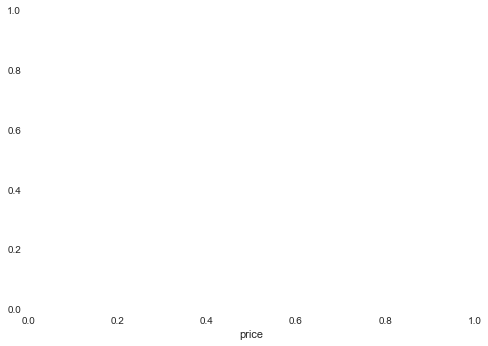

In [243]:
carsales_Profile = pandas_profiling.ProfileReport(carsales_df)
carsales_Profile.to_file("CarSales_Before_Processing.html")

---
### The profiing report describes
* There are 113 duplicated rows (Action - Remove the duplcates)
* 1% of missing cells are in the dataset (Action - Replace with default/mean value or discard the record)
* 5 Categorical variables, 4 numeric variables and 1 boolean value

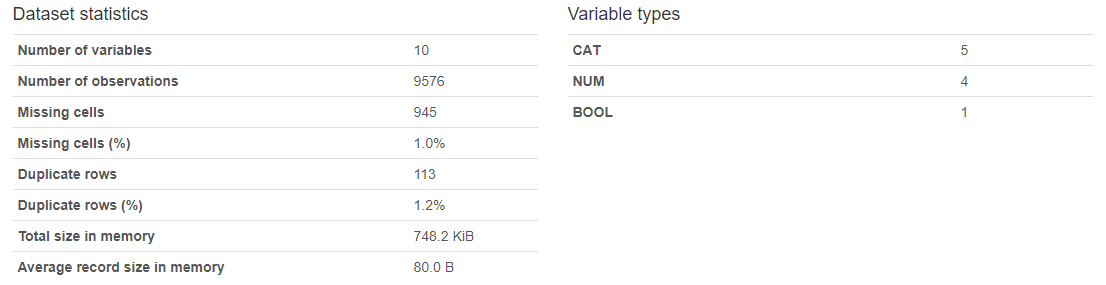

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

# <div style="text-align:center;background: -webkit-linear-gradient(#fff, #888);-webkit-background-clip: text;-webkit-text-fill-color: transparent;"> Data Cleansing </div>


* Removing the duplicates (113 records identified)
* Numerical Values to be fixed.
    * engV - after removing duplicates there are **434** entries has '0' price value which seems like incorrect
        * Queries
            * carsales_df.engV.describe()
            * carsales_df[carsales_df.engV == 0].car.count()
            
    * price - after removing duplicates there are **240** entries has '0' price value which seems like incorrect
        * Queries
            * carsales_df.price.describe()
            * carsales_df[carsales_df.price == 0].car.count()
            
    * mileage - - after removing duplicates there are **310** entries has '0' mileage value which seems like incorrect
        * Queries
            * carsales_df.mileage.describe()
            * carsales_df[carsales_df.mileage == 0].car.count()
            
* Categorical Values to be fixed
    * Drive
    * engType

In [ ]:
# lets Drop the duplicate Value

carsales_df.drop_duplicates(inplace=True)
carsales_df.shape

---
<a name = Section6_1></a>
### 6.1 Fixing *engV* missing / erroneous values

In [ ]:
'''
Function that removes the ourlier entries of engV and returns dataframe
'''
def exclude_outliers_for_engV():
    return pd.DataFrame(carsales_df[(carsales_df.engV > 0.5) & (carsales_df.engV < 25)])



'''
Function that computes the mean value of engV based on make and model 
'''
def compute_engV_mean(r):
    car_make = r.name[0]    
    car_model = r.name[1]
    if r.count() > 0:
        return round(r.mean(),2)
    else:
        engV_df = exclude_outliers_for_engV()
        engV_make = engV_df[engV_df.car == car_make].engV
        if engV_make.count() > 0:
            return round(engV_make.mean(),2)
        else:
            return round(engV_df.engV.mean(),2)
        
'''
Create a staging "engV mean" dataframe for  all combinations of make and model
'''
engV_mean = carsales_df.groupby(['car','model']).engV.apply(compute_engV_mean).reset_index()
engV_mean.rename(columns={'engV':'engV_avg'}, inplace=True)
engV_mean.head(5)

In [ ]:
'''
Function that return engV value for missing records
'''
def get_missing_engV(r):
    if pd.isnull(r.engV):
        return engV_mean[(engV_mean.car == r.car) & (engV_mean.model == r.model)].engV_avg.values[0]
    else:
        return r.engV
    

'''
Fix the missing engV values
'''
print('--------------Before fix-----------------')
print(carsales_df[carsales_df.engV.isnull()].shape)

carsales_df.engV = carsales_df.apply(get_missing_engV, axis=1)
print('--------------After fix -----------------')
print(carsales_df[carsales_df.engV.isnull()].shape)

---
<a name = Section6_2></a>
### 6.2 Fixing *price* missing / erroneous values

In [ ]:
'''
Function that computes the median value of price based on make and model 
'''
def compute_price_median(r):
    car_make = r.name[0]    
    car_model = r.name[1]
    if (r.count() > 0) & (r.median() > 0):
        return r.median()
    else:
        price_make = carsales_df[carsales_df.car == car_make].price
        if price_make.median() > 0:
            return price_make.median()
        else:
            return carsales_df.price.median()

        
'''
Create a staging "Price median" dataframe for  all combinations of make and model
'''
price_median = carsales_df.groupby(['car','model']).price.apply(compute_price_median).reset_index()
price_median.rename(columns={'price':'price_median'}, inplace=True)
price_median.head(5)

In [ ]:
'''
Function that return price value for missing records
'''
def get_missing_price(r):
    if r.price == 0:
        return price_median[(price_median.car == r.car) & (price_median.model == r.model)].price_median.values[0]
    else:
        return r.price
    

'''
Fix the missing price values
'''
print('--------------Before fix-----------------')
print(carsales_df[carsales_df.price == 0].shape)

carsales_df.price = carsales_df.apply(get_missing_price, axis=1)
print('--------------After fix -----------------')
print(carsales_df[carsales_df.price == 0].shape)

---
<a name = Section6_3></a>
### 6.3 Fixing *mileage* missing / erroneous values

In [ ]:
'''
Function that computes the median value of mileage based on make and model 
'''
def compute_mileage_median(r):
    car_make = r.name[0]    
    car_model = r.name[1]
    if (r.count() > 0) & (r.median() > 0):
        return r.median()
    else:
        mileage_make = carsales_df[carsales_df.car == car_make].mileage
        if mileage_make.median() > 0:
            return mileage_make.median()
        else:
            return carsales_df.mileage.median()
        

        '''
Create a staging "mileage median" dataframe for  all combinations of make and model
'''
mileage_median = carsales_df.groupby(['car','model']).mileage.apply(compute_mileage_median).reset_index()
mileage_median.rename(columns={'mileage':'mileage_median'}, inplace=True)
mileage_median.head(5)

In [ ]:
'''
Function that return mileage value for missing records
'''
def get_missing_mileage(r):
    if r.mileage == 0:
        return mileage_median[(mileage_median.car == r.car) & (mileage_median.model == r.model)].mileage_median.values[0]
    else:
        return r.mileage
    

'''
Fix the missing price values
'''
print('--------------Before fix-----------------')
print(carsales_df[carsales_df.mileage == 0].shape)

carsales_df.mileage = carsales_df.apply(get_missing_mileage, axis=1)
print('--------------After fix -----------------')
print(carsales_df[carsales_df.mileage == 0].shape)

---
<a name = Section6_4></a>
### 6.4 Fixing *drive* missing / erroneous values

In [ ]:
'''
Function that removes the null entries of drive and returns dataframe
'''
def get_clensed_data_for_drive():
    return pd.DataFrame(carsales_df[carsales_df.drive.isnull() == False])


'''
Function that computes the mode value of drive based on make and model 
'''
def compute_drive(r):
    car_make = r.name[0]    
    car_model = r.name[1]
    if r.count() > 0:
        return r.mode()
    else:
        drive_df = get_clensed_data_for_drive()
        drive_make = drive_df[drive_df.car == car_make].drive
        if drive_make.count() > 0:
            return drive_make.mode()
        else:
            return drive_df.drive.mode()
        
        
'''
Create a staging "drive mode" dataframe for  all combinations of make and model
'''
drive_mode = carsales_df.groupby(['car','model']).drive.apply(compute_drive).reset_index()
drive_mode.rename(columns={'drive':'drive_mode'}, inplace=True)
drive_mode.drop('level_2', axis=1)

In [ ]:
'''
Function that return drive value for missing records
'''
def get_missing_drive(r):
    if pd.isnull(r.drive):
        return drive_mode[(drive_mode.car == r.car) & (drive_mode.model == r.model)].drive_mode.values[0]
    else:
        return r.drive
    
'''
Fix the missing drive values
'''
print('--------------Before fix-----------------')
print(carsales_df[carsales_df.drive.isnull()].shape)

carsales_df.drive = carsales_df.apply(get_missing_drive, axis=1)
print('--------------After fix -----------------')
print(carsales_df[carsales_df.drive.isnull()].shape)

---
<a name = Section6_5></a>
### 6.5 Fixing *engType* missing / erroneous values

In [ ]:
'''
Function that removes the null entries of engType and returns dataframe
'''
def get_clensed_data_for_engType():
    return pd.DataFrame(carsales_df[carsales_df.engType.isnull() == False])


'''
Function that computes the mode value of drive based on make and model 
'''
def compute_engType(r):
    car_make = r.name[0]    
    car_model = r.name[1]
    if r.count() > 0:
        return r.mode()
    else:
        engType_df = get_clensed_data_for_engType()
        engType_make = engType_df[engType_df.car == car_make].engType
        if engType_make.count() > 0:
            return engType_make.mode()
        else:
            return engType_df.engType.mode()
        
        
'''
Create a staging "engType mode" dataframe for  all combinations of make and model
'''
engType_mode = carsales_df.groupby(['car','model']).engType.apply(compute_engType).reset_index()
engType_mode.rename(columns={'engType':'engType_mode'}, inplace=True)
engType_mode.drop('level_2', axis=1)

In [ ]:
'''
Function that return drive value for missing records
'''
def get_missing_engType(r):
    if pd.isnull(r.engType):
        return engType_mode[(engType_mode.car == r.car) & (engType_mode.model == r.model)].engType_mode.values[0]
    else:
        return r.engType
    
'''
Fix the missing engType values
'''
print('--------------Before fix-----------------')
print(carsales_df[carsales_df.engType.isnull()].shape)

carsales_df.engType = carsales_df.apply(get_missing_engType, axis=1)
print('--------------After fix -----------------')
print(carsales_df[carsales_df.engType.isnull()].shape)

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [ ]:
carsales_Profile = pandas_profiling.ProfileReport(carsales_df)
carsales_Profile.to_file("CarSales_Post_Processing.html")

---
<a name = Section7_1></a>
### 7.1 CarSales dataset stats  & warnings
<br>
<br>

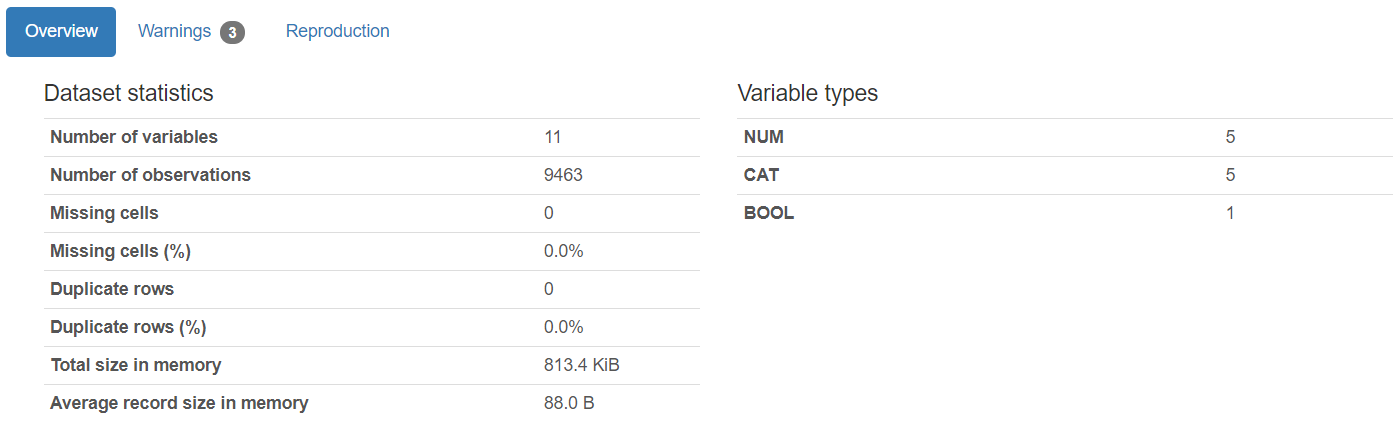

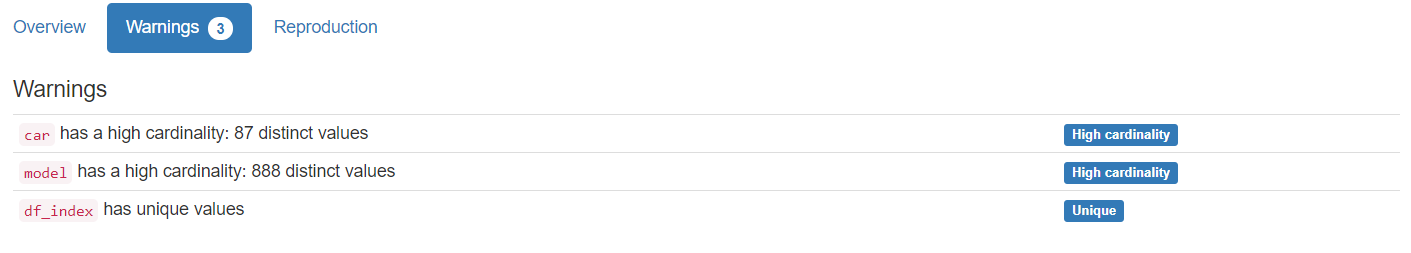

From the above observations, it looks the Carsales dataset is cleansed/processed correctly. 
* no missing values
* no duplicate records

Though the high cardiality has been observed on car and model columns (series), it's an expected behaviour of dataset

Lets start visualizing the data. 

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

---
<a name = Section8_1></a>
### 8.1 Q - Which car manufacturer had highest sales?

In [ ]:
df = pd.DataFrame(carsales_df.car.value_counts())
print(df.head())

In [ ]:
ax = df.head(10).plot.bar(figsize=(15,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/4), p.get_height()+5), rotation=0)
    
plt.title("Top 10 car brands on sale")

From the dataset, the top performing car sales are from following manufacturers
1. Volkswagen     927
2. Mercedes-Benz  885
3. BMW            684
4. Toyota         529
5. VAZ            488
6. ...

---
<a name = Section8_2></a>
### 8.2 Q - What is the sales trend for top selling car manufacturers?

In [ ]:
carsales_year_df = pd.DataFrame(carsales_df.groupby('year').car.value_counts())
carsales_year_df.rename(columns={'car':'sales'}, inplace=True)
carsales_year_df.reset_index(inplace=True)


In [ ]:
topCarBrandSales = carsales_year_df[carsales_year_df.car.isin(df.head(5).index)]
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=topCarBrandSales, x='year', y='sales', hue='car')

In [ ]:
recentCarSalesTopBrands = carsales_year_df[carsales_year_df.car.isin(df.head(5).index) &  (carsales_year_df.year >= 2010)]
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=recentCarSalesTopBrands, x='year', y='sales', hue='car')

---

### **Observations**:
1. Overall Volkswagen used car are reported high sales and occupies 1st place, but the saleas are not performing very low in the recent past.
2. Mercedes-Benz significantly performing best sales and followed by BMW. These brands sales are sky rocketed and proven the customer trust.
3. Toyota cars are consistant in sales and keeping their position.
4. On flip side, Volkswagen and Vaz car sales are under performing in recently.

---
<a name = Section8_3></a>
### 8.3 Q - Which cars gain or loose the market?

In [ ]:
'''
Function that returns perticular year sales
'''
def get_SalesByYear(year):
    return carsales_year_df[carsales_year_df.year == year]

'''
Function that returns rank of a car
'''
def get_CarSalesRankByYear(r):
    result = get_SalesByYear(r.year).sales.unique()
    i, = np.where(result == r.sales)
    return i[0]+1

In [ ]:
# Add a new column called 'year_rank' to maintain year wise car sales rank

carsales_year_df['year_rank'] = carsales_year_df.apply(get_CarSalesRankByYear, axis=1)

In [ ]:
# Top 5 ranked cars from 2009

recenttopcars = carsales_year_df[(carsales_year_df.year_rank <=5) &  (carsales_year_df.year >= 2009)].car.unique()
recenttopcars

In [ ]:
topcarbrands = carsales_year_df[(carsales_year_df.year_rank <=5) &  (carsales_year_df.year >= 1980)].car.unique()
topcarbrands

In [ ]:
recentCarSalesRanks = carsales_year_df[carsales_year_df.car.isin(recenttopcars) & (carsales_year_df.year >= 2009)]

In [ ]:
recentCarSalesRanks.pivot_table(index=['year'], columns={'car'}, values='sales')

In [ ]:
recentCarSalesRanks.pivot_table(index=['year'], columns={'car'}, values='year_rank')

In [ ]:
sns.lmplot(data=recentCarSalesRanks, x='year', y='sales', col='car', fit_reg=True, hue='car', col_wrap=4, height=3)

In [ ]:
sns.lmplot(data=recentCarSalesRanks, x='year', y='year_rank', col='car', fit_reg=True, hue='car', col_wrap=4, height=3)

In [ ]:
sns.catplot(x="year", y="year_rank", hue="car", kind="swarm", data=recentCarSalesRanks)

In [ ]:
topcarbrands = pd.DataFrame(topcarbrands)
topcarbrands.rename(columns={0:'car'}, inplace=True)

In [ ]:
def get_IsTopSelling(r):
    return r.car in recenttopcars

topcarbrands['is_top_selling'] = topcarbrands.apply(get_IsTopSelling, axis=1)

In [ ]:
#print(topcarbrands[topcarbrands.is_top_selling == False].car, topcarbrands[topcarbrands.is_top_selling == True].car)

---

### **Observations**:

* Following are the brands which **loose the market**
    * VAZ
    * Moskvich-AZLK
    * Lincoln
    * UAZ
    * GAZ
    * Opel
    * Mazda
    * Volvo
    * Fiat
    * Peugeot
    * Daewoo
    * Chevrolet

* Following are the brands which **gain/sustain the market**
    * Audi
    * Ford
    * Mercedes-Benz
    * Volkswagen
    * BMW
    * Nissan
    * Toyota
    * Mitsubishi
    * Renault
    * Skoda
    * Hyundai
    * Honda
   
---

---
<a name = Section8_4></a>
### 8.4 Q - What are the top 10 Pemium cars & models and their sales?

In [ ]:
carsales_df[carsales_df.price.isin(carsales_df.price.nlargest(10))].sort_values('price', ascending=False)

In [ ]:
cars_with_max_price_df = pd.DataFrame(carsales_df.groupby('car').price.max())
cars_with_max_price_df.reset_index(inplace=True)
cars_with_max_price_df.rename(columns={'price':'max_price'}, inplace=True)

In [ ]:
def get_totalcarsales(r):
    return carsales_df[(carsales_df.car == r.car) & (carsales_df.price == r.max_price)].car.count()

def get_latestyearofsale(r):
    return carsales_df[(carsales_df.car == r.car) & (carsales_df.price == r.max_price)].year.max()


In [ ]:
cars_with_max_price_df['total_sales'] = cars_with_max_price_df.apply(get_totalcarsales, axis=1)
cars_with_max_price_df['recently_sold_on'] = cars_with_max_price_df.apply(get_latestyearofsale, axis=1)


In [ ]:
sns.scatterplot(data=cars_with_max_price_df.sort_values('max_price', ascending=False).head(10), x='recently_sold_on', y='max_price', hue='car')

---
### **Observations**:

**Top 10 premium car's sales reported as follows.**
* Bentley
    * Mulsanne
    * Bentayga
    * Flying Spur
* Mercedes-Benz
    * S 600
    * G 500
    * S-Guard
* Land Rover
    * Range Rover
    

**Sales of these cars gives interesting result.**

* Though **Mercedes-Benz** and **Land Rover** are proven strength in sales under Premium sector, neverthless **Bentley** dominating recently in this segment.
* Following cars are reported premium car sales in recent years:
    - Bentley
    - Mercedes-Benz
    - Land Rover
    - Ferrari
    - Toyota
    - Tesla
    - Lexus
    - Cadillac
    - BMW
    - Lamborghini
* But latest reported high priced cars sold as below.
    - Lamborghini - 2008
    - Mercedes-Benz & Ferrari - 2012
* There are no such high priced cars sold from 2013 till 2015
* Tremendus sales reported in 2016 for these super premium cars by **Bentley, Land Rover, Toyota, Tesla, Lexus, Cardillac & BMW**
* It's also worth to note that, 
    * **Crossovers** are leading in this space followed by **sedans**
    * Preferred to have **full** wheel and **rear** wheel drive
    * All these premium cars engine type is **Petrol** 


---
<a name = Section8_5></a>
### 8.5 Q - What are the sales & revenue in each segment of class ?

In [ ]:
'''
Fuction that computes the class of the car based on price
Rules:
    -- Economy --> Price less than 10000 
    -- Luxury  --> Price above 10000 and below 30000
    -- Premium --> Price above 30000
'''
def classify_class(r):
    if r.price <= 10000:
        return "Economy"
    elif (r.price > 10000) & (r.price <= 30000):
        return "Luxury"
    else:
        return "Premium"

In [ ]:
# Set new column called 'class' for defining the sement

carsales_df["class"] = carsales_df.apply(classify_class, axis=1)

In [ ]:
ax = carsales_df["class"].value_counts().plot.bar(figsize=(6,4))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/3), p.get_height()+10), rotation=0)
    
plt.title("Car sales based on Class")

In [ ]:
revenueByClass_df = carsales_df.groupby('class').price.sum()
plt.title('Revenue against Class')
print(revenueByClass_df.plot.pie(autopct='%1.1f%%'))

---
### **Observations**:

* Economy Cars are best selling segment followed by Luxury and Premium
* Though the economy car sales are predominant in sales, but revenues are not impressive.
    * Economy - 18.6%
    * Luxury  - 37.2%
    * Premium - 44.2%


---
<a name = Section8_6></a>
### 8.6 Q - What is the revenue generated in each segment of class ?

In [ ]:
pvt_classyear_sales = carsales_df.pivot_table(index=['year','class'],  values="car", aggfunc='count')
pvt_classyear_sales.reset_index(inplace=True)
pvt_classyear_sales.rename(columns={"car":"car_sales"}, inplace=True)

In [ ]:
'''
Function that returns revenue of a perticular segment in a specific year
'''
def get_revenuebyclass(r):
    return carsales_df[(carsales_df['class'] == r['class']) & (carsales_df.year == r.year)].price.sum()
    

In [ ]:
pvt_classyear_sales['revenue'] = pvt_classyear_sales.apply(get_revenuebyclass, axis=1)

In [ ]:
def get_detailsbyclass(cls):
    return pvt_classyear_sales[pvt_classyear_sales['class'] == cls]

def get_detailsbyclass(cls, year):
    return pvt_classyear_sales[(pvt_classyear_sales['class'] == cls) & (pvt_classyear_sales.year >= year)]

In [ ]:

fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=pvt_classyear_sales[pvt_classyear_sales.year >= 1990], x='year', y='car_sales', hue='class')

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=pvt_classyear_sales[pvt_classyear_sales.year >= 1990], x='year', y='revenue', hue='class')

---
### **Observations**:
  
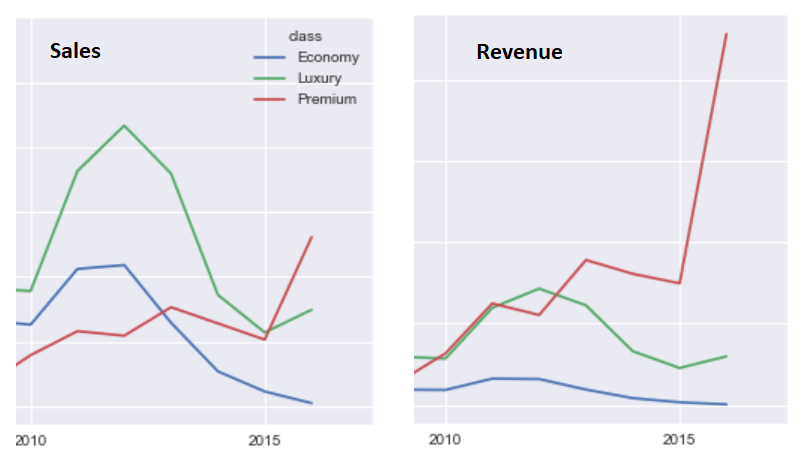

* From the above charts, it is evedent that, Economy car sales are comes to **'0'**, Luxury and Premium takes the momentum of high sales.
* In addition the revenue generated by Premium cars is 500% higher than other cars in recent year.
* So possible reason of reduced sales due to **ground touching Economy class car sales**.

---
<a name = Section8_7></a>
### 8.7 Q - What is the sales trend based on body ?

In [ ]:
carsalesbybody_df = carsales_df.pivot_table(index=['body'],  values="car", aggfunc='count')
carsalesbybody_df.reset_index(inplace=True)
carsalesbybody_df.rename(columns={'car':'sales'}, inplace=True)

In [ ]:
recent_carsalesbybody_df = carsales_df[carsales_df.year > 2010].pivot_table(index=['body'],  values="car", aggfunc='count')
recent_carsalesbybody_df.reset_index(inplace=True)
recent_carsalesbybody_df.rename(columns={'car':'sales'}, inplace=True)

In [ ]:
pvt_bodyyear_sales = carsales_df.pivot_table(index=['year','body'],  values="car", aggfunc='count')
pvt_bodyyear_sales.rename(columns={"car":"car_sales"}, inplace=True)
pvt_bodyyear_sales.reset_index(inplace=True)

def get_sales_by_body(body):
    return pvt_bodyyear_sales[pvt_bodyyear_sales['body'] == body]

# crossover, sedan, van, vagon, hatch, other

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=carsalesbybody_df, x='body', y='sales')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/3), p.get_height()+10), rotation=0)

plt.title('Overall car sales based on body type')

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=recent_carsalesbybody_df, x='body', y='sales')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/3), p.get_height()+10), rotation=0)

plt.title('Recent 5 years car sales based on body type')

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=pvt_bodyyear_sales[pvt_bodyyear_sales.year >= 1990], x='year', y='car_sales', hue='body')

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=pvt_bodyyear_sales[(pvt_bodyyear_sales.year >= 1990) & (pvt_bodyyear_sales.body == 'vagon')], x='year', y='car_sales')
sns.lineplot(data=pvt_bodyyear_sales[(pvt_bodyyear_sales.year >= 1990) & (pvt_bodyyear_sales.body == 'van')], x='year', y='car_sales')
sns.lineplot(data=pvt_bodyyear_sales[(pvt_bodyyear_sales.year >= 1990) & (pvt_bodyyear_sales.body == 'other')], x='year', y='car_sales')

---
### **Observations**:
  
* Overall Crossover, Sedan and hatches are more demanded car body types
* It is observed that recent **crossover sales are skyrocketing**.
* **Van** and **Vagon** body types are loosing sales and **other** cars are gaining market.
* So possible reason of declining sales are **Van & Vagon type cars are loosing market**.

---
<a name = Section8_8></a>
### 8.8 Q - What are the best mileage cars in each segment of 'class' ?

In [ ]:
besteconomycars = carsales_df.pivot_table(index=['class','car'],  values="mileage", aggfunc='max')
besteconomycars.reset_index(inplace=True)

In [ ]:
# Return upper whisker for mileage by class
def get_best_carandmileage_byclass(cls):
    clsmileage = besteconomycars[besteconomycars['class'] == cls]
    maxval = clsmileage.mileage.max()
    thirdQurtile = clsmileage.describe().iloc[6].mileage   
    firstQurtile = clsmileage.describe().iloc[4].mileage     
    iqr = thirdQurtile - firstQurtile
    upperwhisker = min(maxval, thirdQurtile + (1.5 * iqr))
    return upperwhisker

# Get closest upper whisker milage results
def get_closest(cls, val):
    cls_df = carsales_df[carsales_df['class'] == cls]
    return cls_df.iloc[(cls_df['mileage']-val).abs().argsort()[:2]]

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=besteconomycars, x='class', y='mileage', palette='rainbow')

plt.title('Mileage vs Class')

In [ ]:
print(besteconomycars[besteconomycars['class'] == 'Economy'].describe())
print('---------------------')
print(besteconomycars[besteconomycars['class'] == 'Luxury'].describe())
print('---------------------')
print(besteconomycars[besteconomycars['class'] == 'Premium'].describe())

In [ ]:
get_closest('Economy', get_best_carandmileage_byclass('Economy'))

In [ ]:
get_closest('Luxury', get_best_carandmileage_byclass('Luxury'))

In [ ]:
get_closest('Premium', get_best_carandmileage_byclass('Premium'))

---
### **Observations**:
  
* Following are the best mileage given cars in each segment.
    * Economy --> **Kia - Ceed** & **ZAZ - 1103**
    * Luxury  --> **Volkswagen - Eos** & **Mercedes-Benz - S 500**
    * Premium --> **Mercedes-Benz - Sprinter 318 & GL 320**

---
<a name = Section8_9></a>
### 8.9 Q - Used car registrations by class ?

In [ ]:
f,ax = plt.subplots(1,3,figsize=(16,8))
carsales_df[carsales_df['class'] == 'Economy'].registration.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
carsales_df[carsales_df['class'] == 'Luxury'].registration.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
carsales_df[carsales_df['class'] == 'Premium'].registration.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Registration (Economy)')
ax[1].set_title('Registration (Luxury)')
ax[2].set_title('Registration (Premium)')

---
### **Observations**:
  
* Majority of unregistered cars were from **Economy** class

---
<a name = Section8_10></a>
### 8.10 Q - Derive the correlation between sales and other values ?

#### Class wise car prices

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=carsales_df, x='year', y='price', hue='class')

#### Engine Type wise car prices

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=carsales_df, x='year', y='price', hue='engType')
plt.title("Overall car prices by engine type")

In [ ]:
# For last 10 years car sales based on engType, body, class and average price

salesByEngTypeBodyClass_df = carsales_df[carsales_df.year.isin(pd.DataFrame(carsales_df.year.unique())[0].nlargest(10))]
salesByYearBodyClass = salesByEngTypeBodyClass_df.pivot_table(index=['year','engType'], values='price', aggfunc='mean')
salesByYearBodyClass.reset_index(inplace=True)


In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=salesByYearBodyClass, x='year', y='price', hue='engType')
plt.title("Latest 10 year car prices by engine type")

In [ ]:
classsalesByEngType_5year = carsales_df[carsales_df.year.isin(pd.DataFrame(carsales_df.year.unique())[0].nlargest(10))].groupby('year')['engType'].value_counts()
carsalesEngType = pd.DataFrame(classsalesByEngType_5year)
carsalesEngType.rename(columns={'engType':'sales'}, inplace=True)
carsalesEngType.reset_index(inplace=True)

In [ ]:
sns.lmplot(data=carsalesEngType, x='year', y='sales', hue='engType', height=8)
plt.title("Latest 10 year car sales by engine type")

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(x="engType", y="price", hue= "body", palette="husl",data=carsales_df)
ax.set_title("Average price of vehicles by engine type and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

#### car sales by drive

In [ ]:
#fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='drive', data=carsales_df, orient='h')
plt.title("Overall car sales by drive")

In [ ]:
#fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='drive', data=carsales_df[carsales_df.year > 2010], orient='h')
plt.title("Latest 5 year car sales by drive")

#### Yearly car price and sales by engine type

In [ ]:

def get_carpricesales(et):
    return salesByYearBodyClass[salesByYearBodyClass.engType == et]

def get_priceByYearEngType(r):
    return carsales_df[(carsales_df.year == r.year) & (carsales_df.engType == r.engType)].car.count()

def plotGraph(et):
    carSalesPrice = get_carpricesales(et)
    plt.figure(figsize=(20, 8))
    ax = carSalesPrice.plot('year','sales')
    carSalesPrice.plot('year','price',secondary_y=True, ax=ax)
    plt.legend()
    

In [ ]:
salesByYearBodyClass['sales'] = salesByYearBodyClass.apply(get_priceByYearEngType, axis=1)

In [ ]:
petrolcarSalesPrice = get_carpricesales('Petrol')
dieselCarSalesPrice = get_carpricesales('Diesel')
gasCarSalesPrice = get_carpricesales('Gas')
otherCarSalesPrice = get_carpricesales('Other')

plt.figure(figsize=(16, 8))
ax = petrolcarSalesPrice.plot('year','sales', color='r')
petrolcarSalesPrice.plot('year','price', color='g', secondary_y=True, ax=ax)

ax = dieselCarSalesPrice.plot('year','sales', color='orange')
dieselCarSalesPrice.plot('year','price', color='purple', secondary_y=True, ax=ax)

ax = gasCarSalesPrice.plot('year','sales', color='aqua')
gasCarSalesPrice.plot('year','price', color='red', secondary_y=True, ax=ax)

ax = otherCarSalesPrice.plot('year','sales', color='lightgreen')
otherCarSalesPrice.plot('year','price', color='purple', secondary_y=True, ax=ax)

plt.legend()

#### Dataset Correlation with engine type

In [ ]:
sns.pairplot(data=salesByYearBodyClass, hue='engType')

In [ ]:
sns.scatterplot(data=salesByYearBodyClass, x='sales', y='price', hue='engType')

#### Sales percentage by engine type

In [ ]:
carsalesrecent_df = carsales_df[carsales_df.year.isin(pd.DataFrame(carsales_df.year.unique())[0].nlargest())]
carsalesrecent_pv = carsalesrecent_df.pivot_table(index=['engType'], values='car', aggfunc="count")
carsalesrecent_pv.rename(columns={'car':'sales'}, inplace=True)

In [ ]:
carsalesold_df = carsales_df[carsales_df.year < 2012]
carsalesold_pv = carsalesold_df.pivot_table(index=['engType'], values='car', aggfunc="count")
carsalesold_pv.rename(columns={'car':'sales'}, inplace=True)

In [ ]:
carsalesold_pv.plot.pie(y='sales', x='engType', autopct="%0.0f%%")

In [ ]:
carsalesrecent_pv.plot.pie(y='sales', x='engType', autopct="%0.0f%%")

---
### **Observations**:
  
* There are no cars available at 20000 to 36000 price bracket, which is high dense price range
* Though the cars with Gas engine type sold at most economical price, in the recent days customers are not preferred.
* Most preferred engine type is Petrol and Diesel.
* Other engine type cars are gradually increasing in sales despite of its high price.
* Front & Full wheel drive cars mostly opted by customers. Rear wheel drive car sales are declined drastically in last 5 years
* Most sales happening price range is between 10000 to 40000 /-
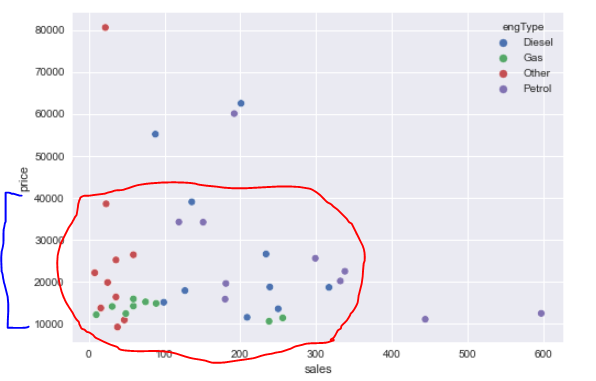


---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**
<p align="center"><img src="https://sarasanalytics.com/wp-content/uploads/2020/09/Data-Analysis-in-Excel-v1.jpg" alt="Analytical Conclusions - sarasanalytics.com"></p>
<!-- image taken from sarasanalytics.com -->

1. Most **sales happening price range** is between **10000 to 40000 /-**
2. There are **no cars sold** in **20000 to 36000** price bracket, which is best competitive price range
3. Though the cars with **Gas** engine type sold at most economical price, in the **recent days customers are not preferred**.
4. **None of the cars sold** from **Economy** segment in year **2016**.
5. From the recent past the car sales are stagnated on Gas type. In other hand
    * Petrol car sales are consistent
    * Diesel car sales are gaining momentum
    * Other car sales are gradullay increasing
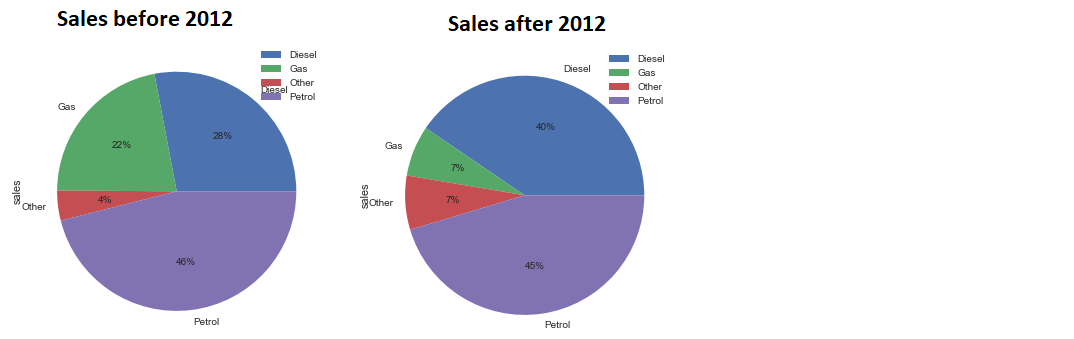

6. Car registrations are most considered in Luxury and Premium cars
7. Even with effordable price range, gas and other engine type cars are least preferred.
8. Most preferred 
    * engine types are Petrol and Diesel
    * body types are cross-overs and sedan
    * Other type cars are consistent and gradually increasing in sales
9. Irrespective of tenure, Sedans are always on demand follows with Cross-over and hatch.
10. Tremendus sales reported in **2016** for these super premium cars by **Bentley, Land Rover, Toyota, Tesla, Lexus, Cardillac & BMW**
11. recently **Crossovers** are leading in sales followed by **sedans**
12. Most of the recent premium cars engine type is **Petrol** 
13. Cars Loose / Gain Demand
    * Following are the brands which **loose the market**
        * VAZ
        * Moskvich-AZLK
        * Lincoln
        * UAZ
        * GAZ
        * Opel
        * Mazda
        * Volvo
        * Fiat
        * Peugeot
        * Daewoo
        * Chevrolet

    * Following are the brands which **gain/sustain the market**
        * Audi
        * Ford
        * Mercedes-Benz
        * Volkswagen
        * BMW
        * Nissan
        * Toyota
        * Mitsubishi
        * Renault
        * Skoda
        * Hyundai
        * Honda

<a name = Section92></a>
### **9.2 Actionable Insights**

1. **Cars should be available from all price ranges**.
    * As **10000 to 40000 /-** is the most sales happening price range and there are no cars available in **20000 to 36000 /-** price bracket, procuring these price ranged cars should protentially improves the sales.
2. **Sense the customer likelyhood and market more such cars**.
    * Petrol and Diesel cars are most popular. 
    * Full wheel drive is most preferred in Crossovers and Front wheel drive in Sedan cars
    * So bring more inventory from most value for money branded cars like Mercedes-Benz, Toyota, BMW, Volkswagen etc..
        Crossovers with Full wheel drive
        Sedans with front wheel drive
    * Luxury and Premium used cars booming sales due to hike in new car prices.
3. Market & Procure more **latest, future ready and sophisticated cars** like Engine type **other (Hybrid and Electric cars)**. Despite the fact that car sales fluctuated across years, the Other cars sales are consistent and seen ramp up in sales recently.
4. Immediate tactical approach and Impressive strategic approach
    * **Tactical Approach**
        * Less preferred old cars should be announced with great deals and clear the stock. In that way we can save money, renting space for storage
        * Procure more demaded cars like Mercedes-Benz, BMW, Volkswagen, Toyota, Nissan, Ford, Audi.. etc
    * **Strategic Approach**
        * Economy cars are ideally most selling. And most recent economy car are gas engines which are not preferred by customers. So procure more Economy price range cars which is of Petrol or Diesel engine types
